<a href="https://colab.research.google.com/github/Zionie111/Machine-Learning-Assignments/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Life Expectancy Prediction

This notebook focuses on predicting the life expectancy of individuals at a country level using machine learning techniques

**Dataset Overview**
- Source: Kaggle (Life Expectancy WHO dataset)
- Temporal Coverage: 2000 - 2015
- Geographical Coverage: 193 countries
- Data Content: The dataset comprises 22 columns and 2938 rows, each representing a unique combination of country and year.

**Objective**
The goal is to develop predictive model capable of estimating life expectancy based on the provided features.By analyzing this comprehensive dataset, I  aim to uncover patterns and insights that can help understand and potentially influence factors contributing to human lifespan.

Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import numpy as np

Loading the Dataset

In [120]:
df = pd.read_csv('Life Expectancy Data.csv', na_values=['NA', 'nan','NaN'])

In [12]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [173]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
df['Country'].value_counts()

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

In [14]:
df['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

DATA CLEANING AND PREPROCESSING

Label Encoding Categorical data (Status). Countries will not be labelled since we have 193 countries and its already too much

In [18]:
# Encode categorical data to prepare for the data for machine learning
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status'])

In [19]:
df['Status'].value_counts()

1    2426
0     512
Name: Status, dtype: int64

*Status Labels*
- 0 = Developed Countries
- 1 = Developing Countries

In [ ]:
# Check missing values
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [121]:
# Drop the missing Values
df.dropna(inplace = True)

In [117]:
# Check duplicates
df.duplicated().sum()

0

Exploratory Data Analysis

In [20]:
# Get general stats
df.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,0.825732,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,0.379405,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,1.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,1.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,1.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,...,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [21]:
# Check correlation
df.corr()

<ipython-input-21-962030d02884>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.001864,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,...,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Status,0.001864,1.000000,-0.482136,0.315284,0.112252,-0.596660,-0.454261,-0.115317,0.076955,-0.311257,...,-0.220250,-0.299990,-0.216913,0.148590,-0.478339,0.045801,0.368389,0.366751,-0.478402,-0.514045
Life expectancy,0.170033,-0.482136,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,...,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,0.315284,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,...,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,0.112252,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,...,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,-0.596660,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,...,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,-0.454261,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,...,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,-0.115317,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,...,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,0.076955,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,...,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,-0.311257,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,...,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961


<ipython-input-32-2c591c1e4276>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 10})


<Axes: >

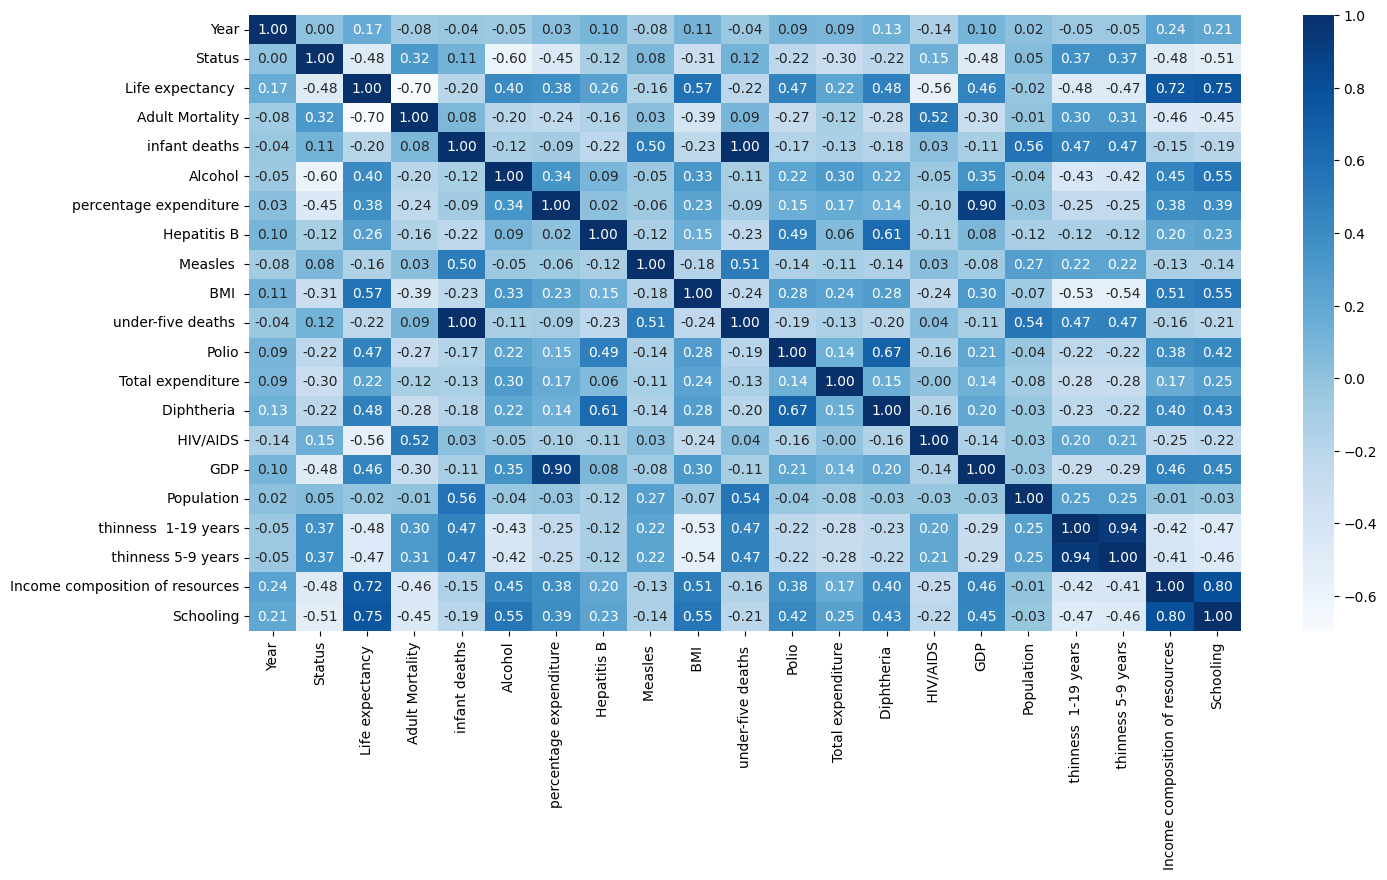

In [32]:
# Plotting the Heatmap for correlations
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 10})

In [33]:
# Selecting specific columns from DataFrame df and creating a new Da
df2=df[['Country','Year','Income composition of resources','Schooling', 'Adult Mortality', ' BMI ',' HIV/AIDS','Life expectancy ','GDP']]
df=df[['Country','Year','Income composition of resources','Schooling', 'Adult Mortality', ' BMI ',' HIV/AIDS','Life expectancy ']]


In [35]:
df2.columns

Index(['Country', 'Year', 'Income composition of resources', 'Schooling',
       'Adult Mortality', ' BMI ', ' HIV/AIDS', 'Life expectancy ', 'GDP'],
      dtype='object')

In [122]:
df2.dropna(inplace = True)

<ipython-input-122-6c3633892e9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace = True)


In [36]:
df2['Year'].value_counts()

2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: Year, dtype: int64

Visualizations

<ipython-input-40-21cabf66a29e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True, cmap='magma', fmt=".2f", annot_kws={"size": 10})


<Axes: >

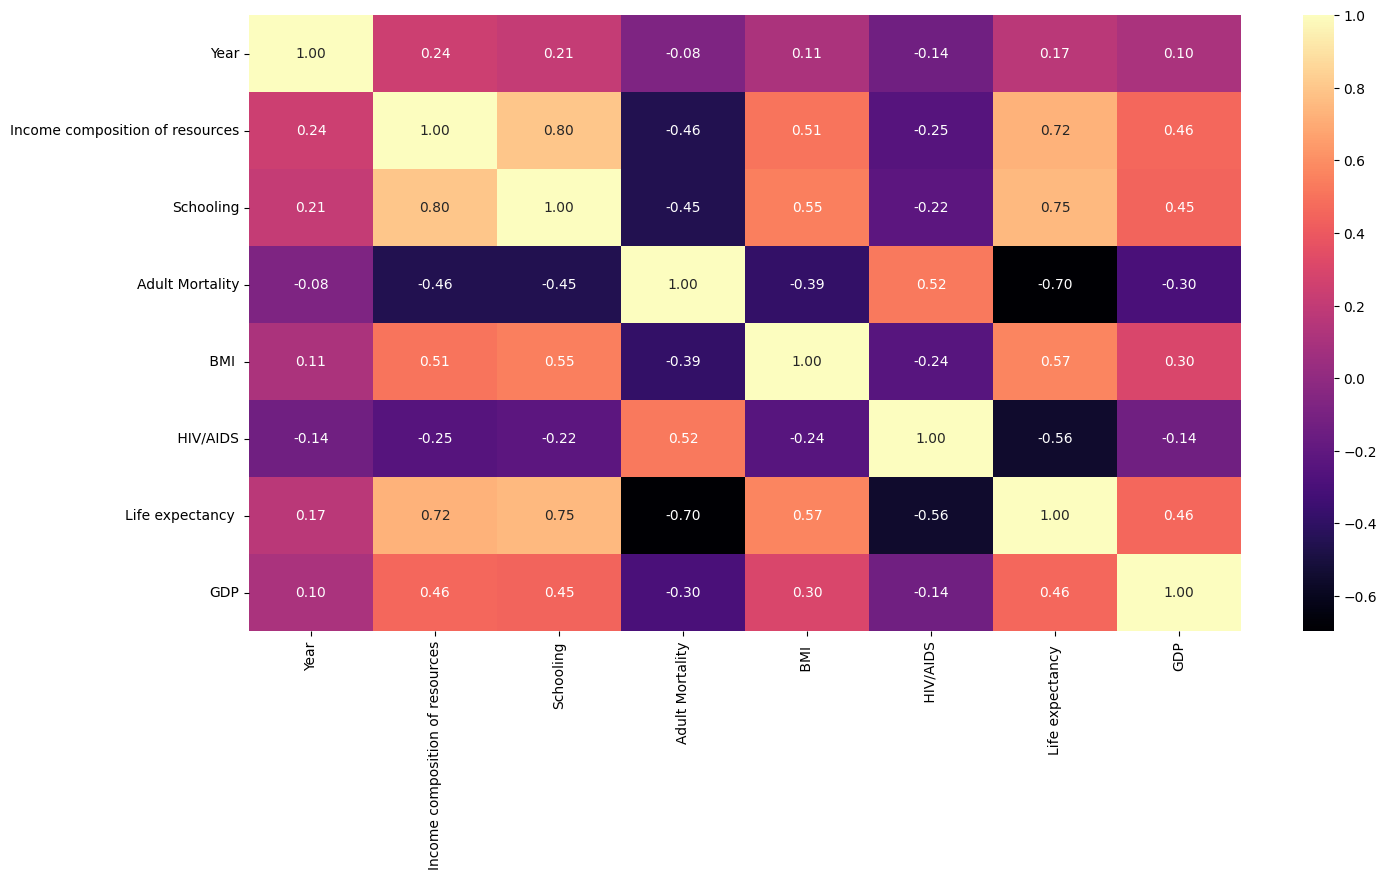

In [40]:
# Plot Heatmap for Selected Important Variables
plt.figure(figsize=(16, 8))
sns.heatmap(df2.corr(), annot=True, cmap='magma', fmt=".2f", annot_kws={"size": 10})

Show relationships between multiple variables using Pair Plots

> Indented block



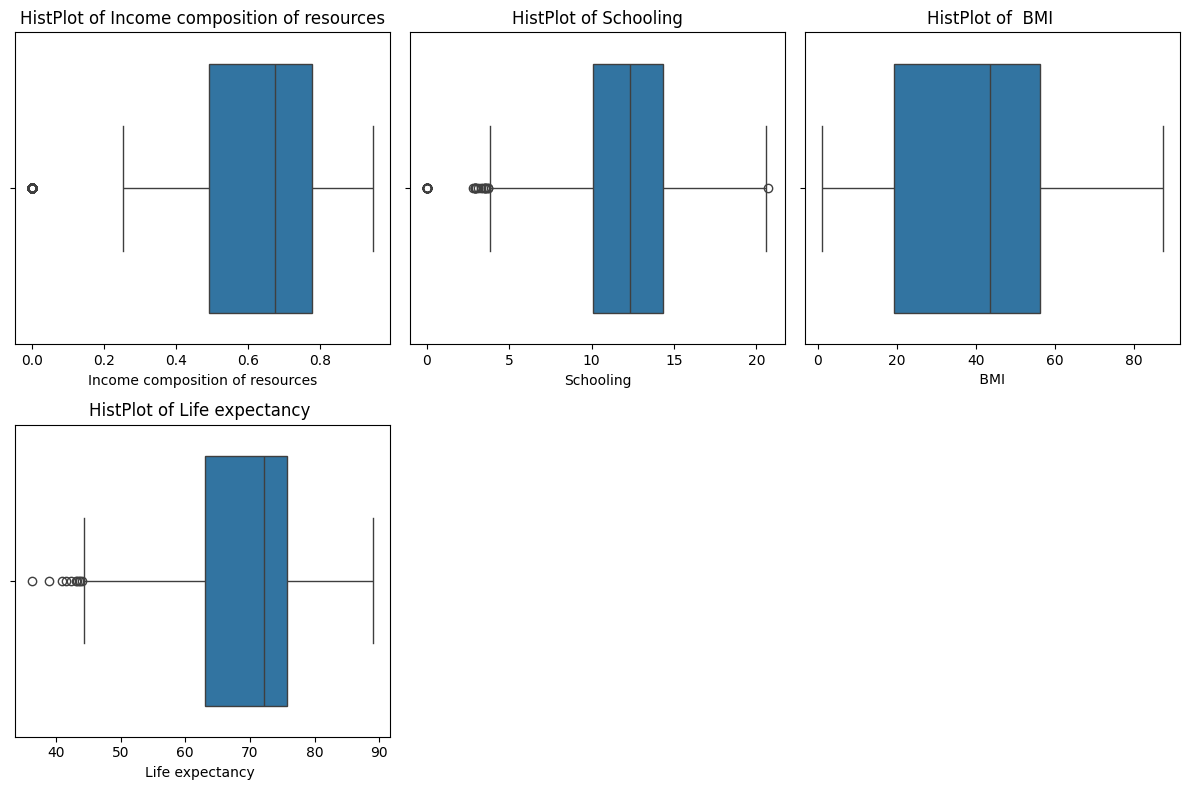

In [53]:
# Create Histplots to determine the distribution of each numerical feature
selected_columns = ['Income composition of resources', 'Schooling', ' BMI ', 'Life expectancy ']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'HistPlot of {feature}')
plt.tight_layout()

There are some outliers in Life Expectancy, Schooling and Income of Resources



In [77]:
# Remove Outliers
# Define IQR function
def outlier_removal(column):

  q1 = column.quantile(0.25)
  q3 = column.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return column[(column >= lower_bound) & (column <= upper_bound)]

# Remove outliers in each column
df2['Income composition of resources'] = outlier_removal(df2['Income composition of resources'])
df2['Schooling'] = outlier_removal(df2['Schooling'])
df2['Life expectancy '] = outlier_removal(df2['Life expectancy '])

<ipython-input-77-9e641ab5e438>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Income composition of resources'] = outlier_removal(df2['Income composition of resources'])
<ipython-input-77-9e641ab5e438>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Schooling'] = outlier_removal(df2['Schooling'])
<ipython-input-77-9e641ab5e438>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

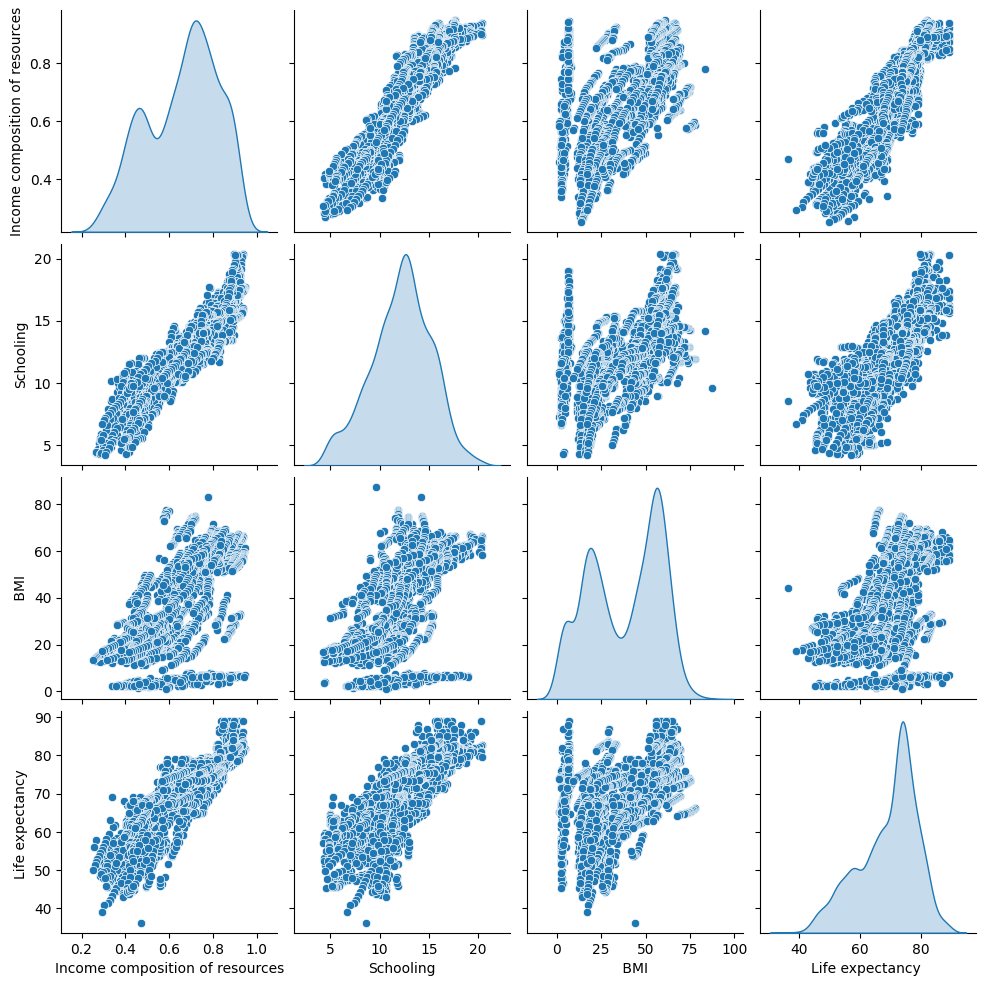

In [78]:
# Create Pairplot for each variable against 'Life expectancy'

# Select relevant columns for pair plotting
selected_columns = ['Income composition of resources', 'Schooling', ' BMI ', 'Life expectancy ']

# Create pair plot
sns.pairplot(df[selected_columns], diag_kind='kde')

The pairplots are showing strong and positive relationship between the Life expectancy and all other values

<Axes: xlabel='Adult Mortality', ylabel='Life expectancy '>

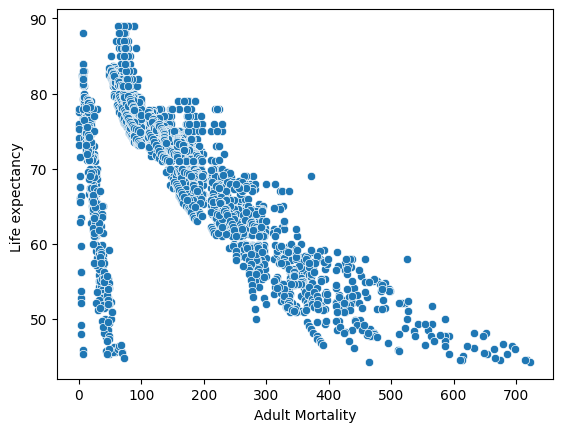

In [79]:
# Scatter plot for adult mortality and Life expectancy
sns.scatterplot(x='Adult Mortality', y='Life expectancy ', data=df2,)

Life expectancy reduces with age

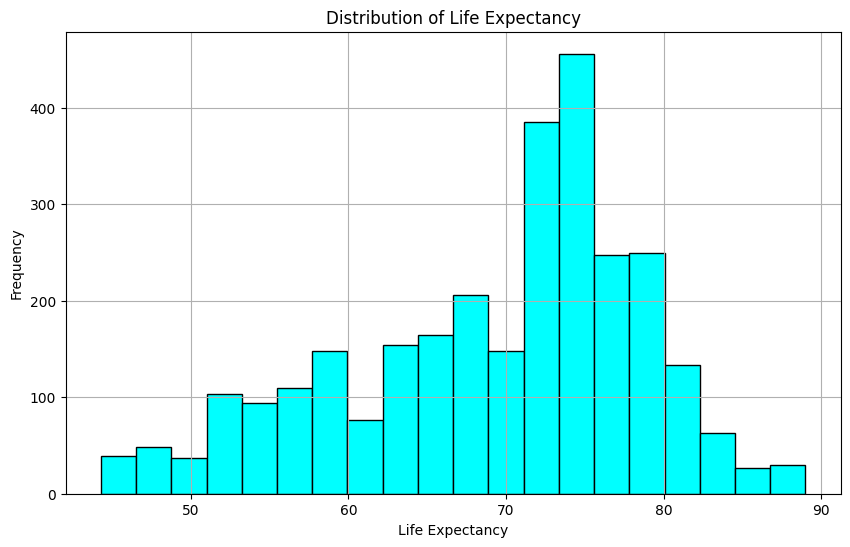

In [81]:
# Plot for life expectancy distribution
plt.figure(figsize=(10, 6))
plt.hist(df2['Life expectancy '], bins=20, color='cyan', edgecolor='black')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.grid(True)

In [84]:
df2.columns

Index(['Country', 'Year', 'Income composition of resources', 'Schooling',
       'Adult Mortality', ' BMI ', ' HIV/AIDS', 'Life expectancy ', 'GDP'],
      dtype='object')

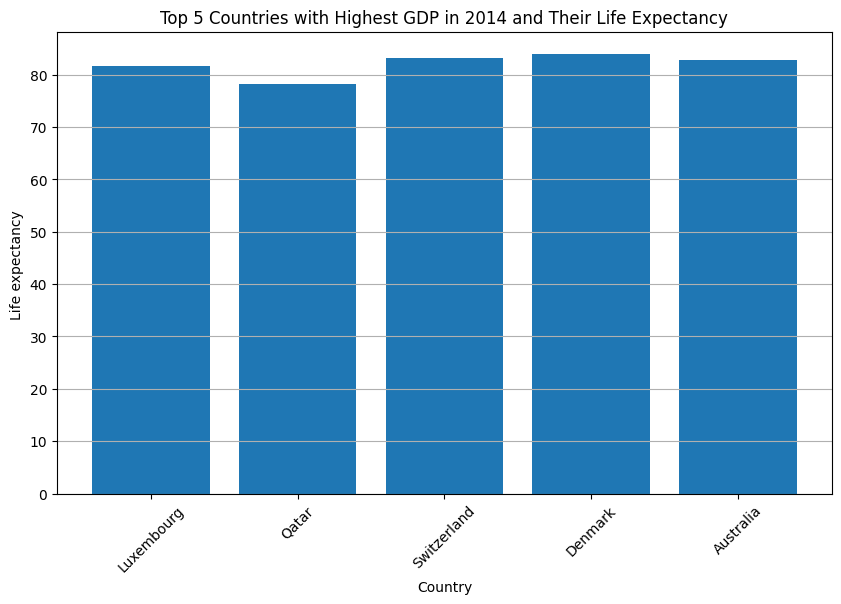

In [85]:
# Display life expectancy in top 5 countries with higest GDP in 2014. You can change the year and see life expectancy for other years
df3=df2[['GDP','Life expectancy ','Year', 'Country']].sort_values('GDP', ascending=False)
df3[df3['Year']==2014].head(5)
# Extracting the top 5 countries with the highest GDP in 2014
top_5_gdp_2014 = df3[df3['Year'] == 2014].head(5)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(top_5_gdp_2014['Country'], top_5_gdp_2014['Life expectancy '])
plt.title('Top 5 Countries with Highest GDP in 2014 and Their Life Expectancy')
plt.xlabel('Country')
plt.ylabel('Life expectancy ')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

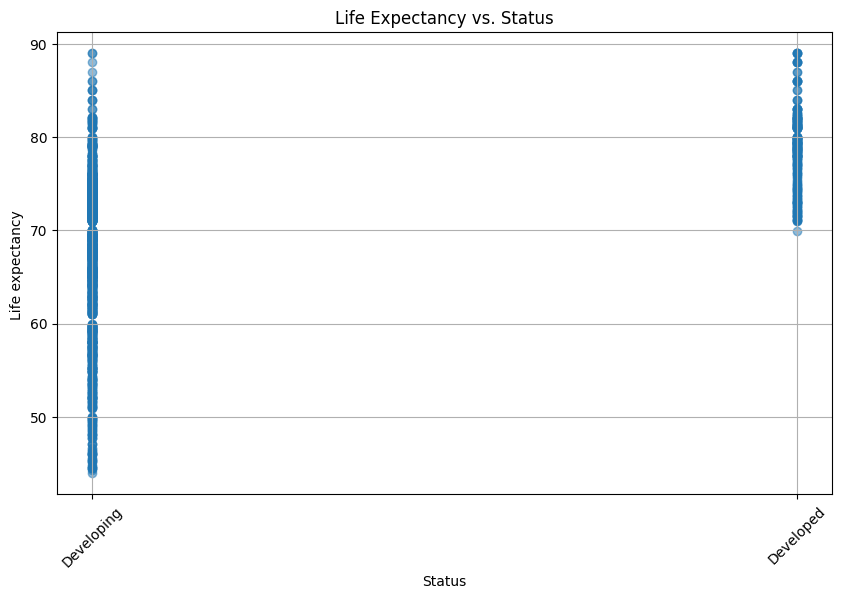

In [175]:
# Scatter plot to show life expectancy in different countries based on status
plt.figure(figsize=(10, 6))
plt.scatter(df['Status'], df['Life expectancy '], alpha=0.5)
plt.title('Life Expectancy vs. Status')
plt.xlabel('Status')
plt.ylabel('Life expectancy ')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

The plot indicates very high life expectancy in developed countries.

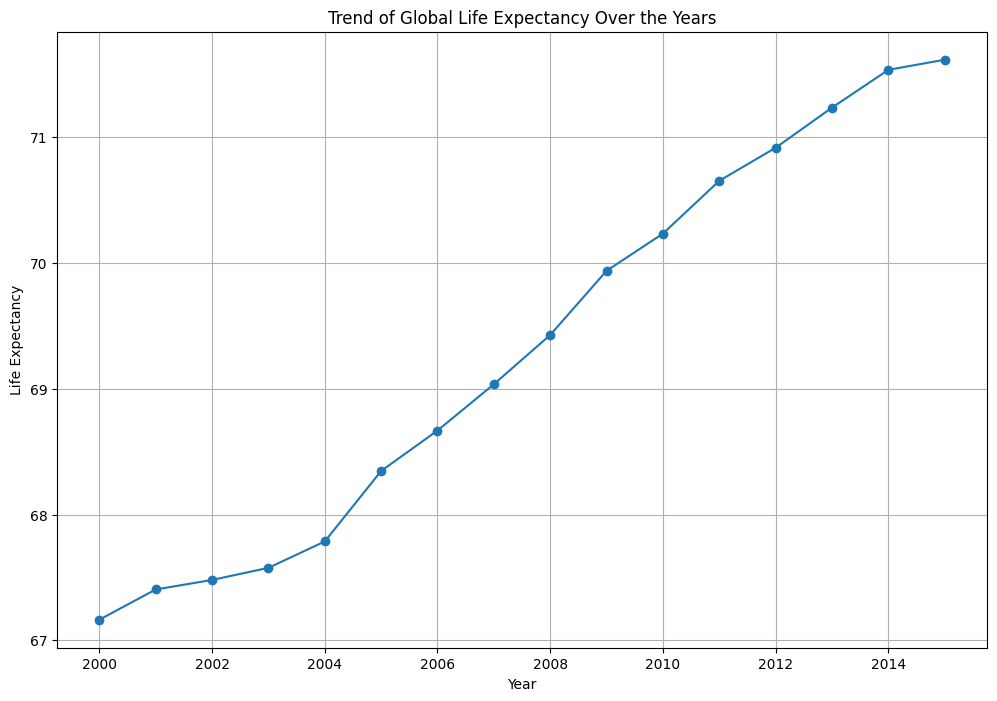

In [88]:
# Display the trend of life expectancy over the years
# Group the data by year and calculate the mean life expectancy for each year
grouped_by_year = df3.groupby('Year')['Life expectancy '].mean()

# Plotting the data
plt.figure(figsize=(12, 8))
plt.plot(grouped_by_year.index, grouped_by_year.values, marker='o', linestyle='-')
plt.title('Trend of Global Life Expectancy Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)

Life expectancy is increasing over the years, but it slightly went down between 2002 and 2003

Modelling

Linear Regression

In [126]:
# Defining features and Label (Selecting features with strong + corr)
X=df2.drop(['Year','Life expectancy ','Country'],axis=1)
y=df2['Life expectancy ']

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [129]:
lr=LinearRegression()

In [130]:
model = lr.fit(X_train, y_train)

In [131]:
model.score(X_train, y_train)

0.879894527649395

In [132]:
model.score(X_test, y_test)

0.8873500676717715

# Model Intrepretation
A score of 0.8799 indicates that the model had a prediction accuracy of 87.99% on the training data.

A test score of 0.8874 indicates that the model has a prediction accuracy of 88.74% on the test data.

The scores indicate that the model performs well because it generalizes well to unseen data, as the testing score is quite close to the training score.

Most importantly, the scores indicate that the model is neither overfitting nor underfitting.

Polynomial Regression

In [166]:
from sklearn.preprocessing import PolynomialFeatures

In [164]:
poly=PolynomialFeatures(2)

In [167]:
X_trans= poly.fit_transform(X)

In [168]:
X_train,X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3, random_state=42)

In [169]:
model.fit(X_train, y_train)

LinearRegression()

In [170]:
model.score(X_train, y_train)

0.916920370683415

In [171]:
model.score(X_test,y_test)

0.9244349438368078

The polynomial regression scores indicate high accuracy, suggesting that the model is a good fit. I also experimented with other polynomial features degrees, such as 3rd and 4th, and obtained the following results:

- PolynomialFeature(3): Train Score = 0.9161, Test Score = 0.9192
- PolynomialFeature(4): Train Score = 0.8325, Test Score = 0.8084"

The 4th degree is showing that the model is slightly overfitting

# **Coclusion**

Both Linear Regression Model and Polynomial Regression Model are a good fit. They are accurating predicting Life expectancy of an individual using the following features:
- Income composition of resources
- Schooling
- Adult Mortality
- BMI
- HIV/AIDS
- Life expectancy
- GDP

These features were selected because they had strong correlation with Life expectancy. Correlations of above 0.5. GDP has a correlation of 0.46 but it was still selected because it reflect the overall economic health and development of the country which inturn affects the availability, accessibility and quality of services and goods in a country